# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

In [22]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


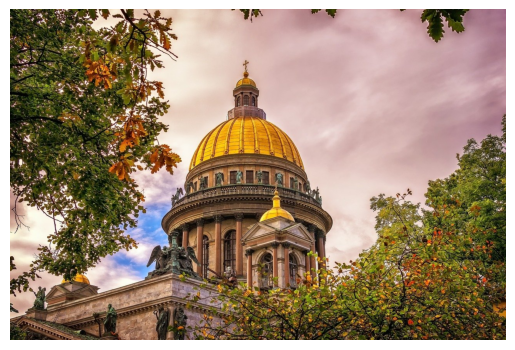

In [24]:
img_path = '/content/drive/MyDrive/DeepLearningCourse/spb_st_isaacs.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [25]:
average_intensity = np.mean(img)

print(f"Среднее значение интенсивности пикселей: {round(average_intensity, 3)}")

Среднее значение интенсивности пикселей: 123.058


Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [26]:
# prompt: Нормируйте значения интенсивностей пикселей, разделив все значения на  255 . Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

normalized_img = img / 255.0
average_normalized_intensity = np.mean(normalized_img)

print(f"Среднее значение нормированной интенсивности пикселей: {round(average_normalized_intensity, 3)}")

Среднее значение нормированной интенсивности пикселей: 0.483


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [27]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

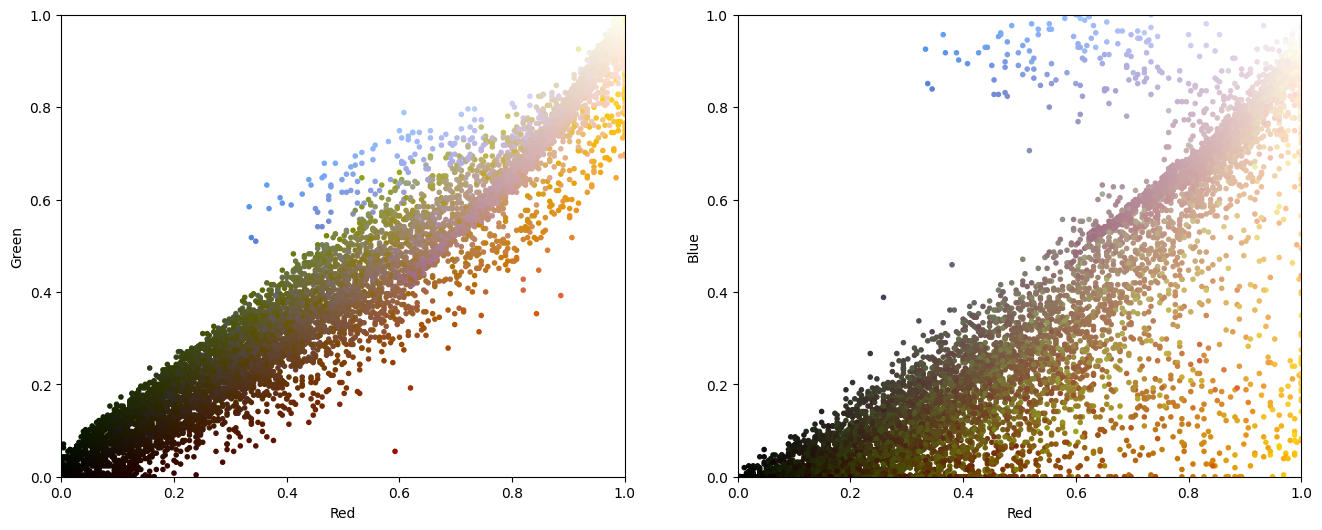

In [28]:
reshaped_img = normalized_img.reshape((-1, 3))
plot_pixels(reshaped_img)

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


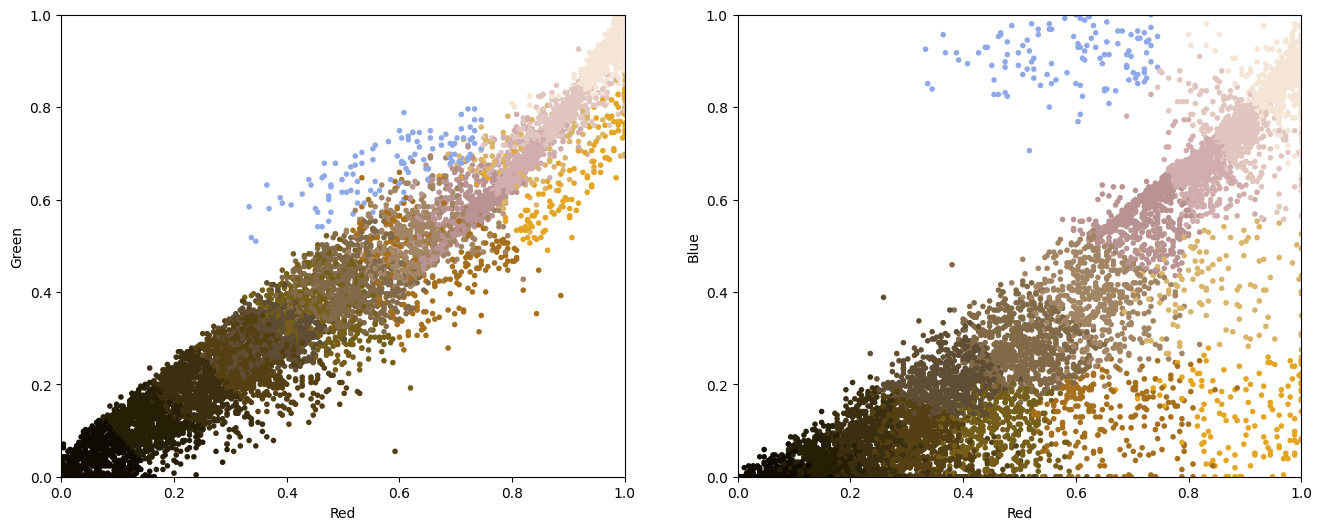

In [29]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=16, random_state=14)
kmeans.fit(reshaped_img)
new_colors = kmeans.cluster_centers_[kmeans.labels_]
plot_pixels(reshaped_img, colors=new_colors)

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [30]:
average_new_intensity = np.mean(new_colors)
print(f"Среднее значение интенсивности пикселей нового изображения: {round(average_new_intensity, 3)}")

Среднее значение интенсивности пикселей нового изображения: 0.482


Выберите номер изображения, соответствующего палитре из $16$ цветов.

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

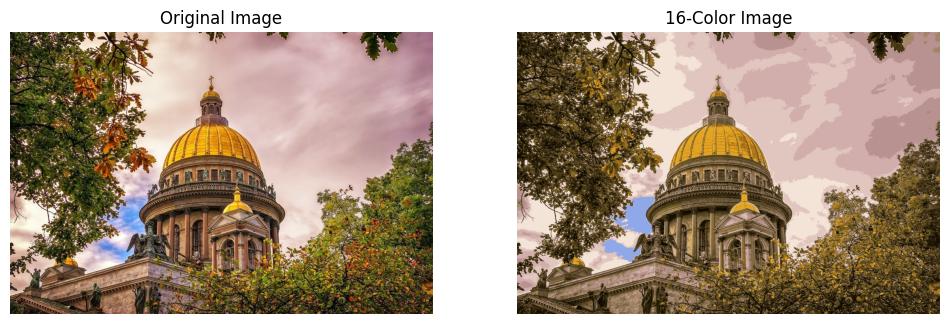

In [31]:
# Reshape the image back to its original shape
new_img = new_colors.reshape(img.shape)

# Display the original and the new image side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(new_img)
axes[1].set_title("16-Color Image")
axes[1].axis('off')

plt.show()

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

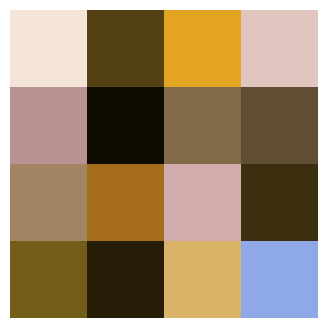

In [32]:
# Reshape the cluster centers to a 4x4 grid
color_grid = kmeans.cluster_centers_.reshape(4, 4, 3)

# Display the 4x4 grid of colors
plt.figure(figsize=(4, 4))
plt.imshow(color_grid)
plt.axis('off')  # Hide axis ticks and labels
plt.show()